# With Valid Stocks and 2 years of data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from mymodule.DatabaseConnection import CRUD
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import importlib
import mymodule.DatabaseConnection  # first import
importlib.reload(mymodule.DatabaseConnection) 

<module 'mymodule.DatabaseConnection' from 'c:\\Projects\\Market\\mymodule\\DatabaseConnection.py'>

In [61]:
lo_stock = CRUD('v_stockdailyupdate')
df_stocks = lo_stock.Read()
df_stocks.dropna(subset=['SectorId'],inplace=True)
df_stocks = df_stocks[df_stocks['BlackListed'].isna()]
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

df_stocks = df_stocks.sort_values('Date')
df_stocks["5DMA"]   = df_stocks["close"].rolling(5).mean()
df_stocks["20DMA"]  = df_stocks["close"].rolling(20).mean()
df_stocks["50DMA"]  = df_stocks["close"].rolling(50).mean()
df_stocks["100DMA"] = df_stocks["close"].rolling(100).mean()
df_stocks["200DMA"] = df_stocks["close"].rolling(200).mean()

df_stocks = df_stocks[df_stocks['Date'] >= '20231201']
df_stocks = df_stocks[df_stocks['Date'] < '20251201']

DataBase Disconnected


In [62]:
df_count = pd.DataFrame(data=df_stocks[df_stocks['Date'] >= '20231201']['ISIN'].value_counts().reset_index())
df_count.columns = ['ISIN', 'COUNT']
df_valid = df_count[df_count['COUNT']==493]
df_stocks = df_stocks.merge(df_valid, how='inner', on='ISIN')

df_stocks = df_stocks.sort_values(by=['ISIN','Date']).reset_index()
df_stocks = df_stocks[['Date','ISIN','SectorId','open','high','low','close','volume','5DMA']]

le = LabelEncoder()
ISIN = le.fit_transform(df_stocks['ISIN'], )

In [63]:
df_stocks

,Date,ISIN,SectorId,open,high,low,close,volume,5DMA
0,2023-12-01,IN9175A01010,8.0,36.85,36.90,35.80,36.20,49578,151.96156
1,2023-12-04,IN9175A01010,8.0,37.00,37.40,35.30,35.70,61428,655.28000
2,2023-12-05,IN9175A01010,8.0,36.85,36.95,35.00,35.20,27774,154.01580
3,2023-12-06,IN9175A01010,8.0,35.05,36.30,34.15,34.60,26283,763.04018
4,2023-12-07,IN9175A01010,8.0,35.00,35.20,33.90,34.65,16356,145.07920
...,...,...,...,...,...,...,...,...,...
893804,2025-11-24,INE999K01014,11.0,13.40,13.40,12.91,12.96,2125247,248.01000
893805,2025-11-25,INE999K01014,11.0,12.95,13.30,12.78,12.86,1955211,273.89800
893806,2025-11-26,INE999K01014,11.0,12.98,13.10,12.92,13.00,1684272,206.87200
893807,2025-11-27,INE999K01014,11.0,13.00,13.12,12.90,12.95,1104720,182.22000


In [64]:
features = ['open', 'high', 'low', 'close', 'volume', '5DMA'] #, '20DMA', '50DMA', '100DMA', '200DMA'] #, 'RSI', ]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_stocks[features])

scaled_df = pd.DataFrame(scaled_data, columns=features, index=df_stocks.index)
scaled_df['ISIN'] = ISIN
scaled_df['SectorId'] = df_stocks['SectorId']

scaled_df.sample(10)

,open,high,low,close,volume,5DMA,ISIN,SectorId
674727,0.014974,0.015289,0.015132,0.015321,0.000008,0.019114,1368,1.0
38933,0.000863,0.000854,0.000857,0.000857,0.002300,0.002123,78,6.0
818661,0.002242,0.002256,0.002149,0.002165,0.000020,0.021796,1660,8.0
47624,0.002159,0.002138,0.002098,0.002113,0.000131,0.016224,96,3.0
588531,0.000480,0.000494,0.000485,0.000490,0.000006,0.025216,1193,7.0
714734,0.009512,0.009658,0.009612,0.009577,0.000012,0.045847,1449,8.0
314474,0.002925,0.003004,0.002912,0.002977,0.000174,0.035061,637,8.0
863723,0.002962,0.003078,0.002964,0.002950,0.000382,0.008624,1751,3.0
166243,0.000287,0.000284,0.000290,0.000286,0.000040,0.041425,337,8.0
601525,0.000487,0.000482,0.000468,0.000467,0.000412,0.208599,1220,3.0


In [9]:
scaled_df.sample(10)

,open,high,low,close,volume,5DMA,ISIN,SectorId
470333,0.002738,0.002731,0.002732,0.002729,0.000702,0.010999,954,3.0
394771,0.000036,0.000036,0.000036,0.000036,0.000017,0.028607,800,8.0
62134,0.000228,0.000228,0.000226,0.000226,0.014623,0.001847,126,8.0
434574,0.006323,0.006346,0.006390,0.006363,0.000020,0.018587,881,4.0
264320,0.007558,0.007646,0.007548,0.007637,0.000021,0.026696,536,8.0
813697,0.004546,0.004506,0.004461,0.004431,0.000037,0.010850,1650,6.0
88952,0.000462,0.000475,0.000455,0.000449,0.000009,0.009470,180,3.0
886669,0.017352,0.017480,0.017438,0.017567,0.000005,0.052175,1798,8.0
28825,0.002066,0.002095,0.002058,0.002092,0.000024,0.017331,58,7.0
353379,0.003461,0.003494,0.003497,0.003454,0.000001,0.027760,716,8.0


In [10]:
lookback = 60
X, y = [], []

for i in range(lookback, len(scaled_df)):
    X.append(scaled_df.iloc[i-lookback:i].values)
    y.append(scaled_df.iloc[i]['close'])

X, y = np.array(X), np.array(y)

print("X shape:", X.shape)  # (samples, timesteps=60, features)
print("y shape:", y.shape)  # (samples,)

X shape: (893749, 60, 8)
y shape: (893749,)


In [11]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [12]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output (predicting next-day price)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Projects\Market\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 1081s 54ms/step - loss: 2.3477e-04 - val_loss: 5.1574e-04
Epoch 2/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 1713s 85ms/step - loss: 2.0392e-04 - val_loss: 5.1238e-04
Epoch 3/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 1785s 89ms/step - loss: 2.0391e-04 - val_loss: 5.1319e-04
Epoch 4/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 2149s 107ms/step - loss: 2.0398e-04 - val_loss: 5.1409e-04
Epoch 5/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 1056s 52ms/step - loss: 2.0393e-04 - val_loss: 5.2011e-04
Epoch 6/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 718s 36ms/step - loss: 2.0396e-04 - val_loss: 5.1506e-04
Epoch 7/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 725s 36ms/step - loss: 2.0393e-04 - val_loss: 5.1416e-04
Epoch 8/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 727s 36ms/step - loss: 2.0387e-04 - val_loss: 5.1361e-04
Epoch 9/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 720s 36ms/step - loss: 2.0396e-04 - val_loss: 5.1558e-04
Epoch 10/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 730s 36ms/step - loss: 2.0395e

5586/5586 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step


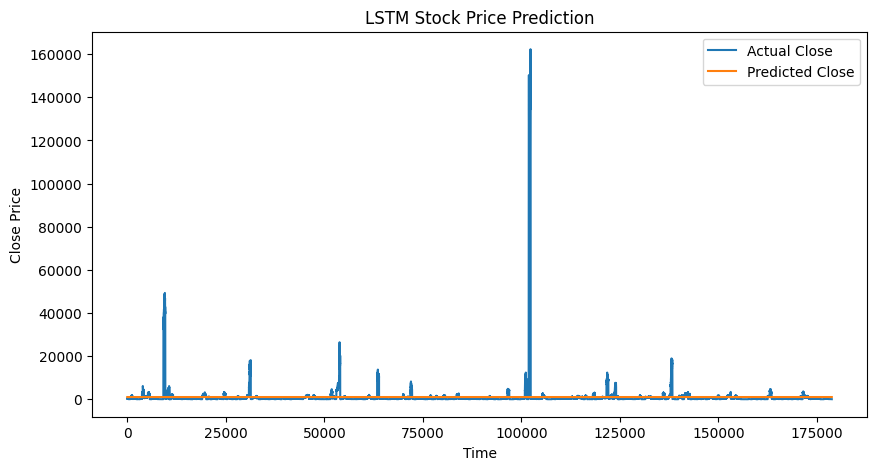

In [14]:
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Inverse scale for interpretability
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[features.index('close')], scaler.scale_[features.index('close')]
y_test_inv = y_test / close_scaler.scale_ - close_scaler.min_ / close_scaler.scale_
y_pred_inv = y_pred / close_scaler.scale_ - close_scaler.min_ / close_scaler.scale_

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual Close')
plt.plot(y_pred_inv, label='Predicted Close')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

MSE : 56109274.2344
RMSE: 7490.6124
MAE : 1437.8624
R²  : -0.0002


In [17]:
features = ['open', 'high', 'low', 'close', 'volume'] #, '20DMA', '50DMA', '100DMA', '200DMA'] #, 'RSI', ]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_stocks[features])

scaled_df = pd.DataFrame(scaled_data, columns=features, index=df_stocks.index)
scaled_df['ISIN'] = ISIN
scaled_df['SectorId'] = df_stocks['SectorId']

scaled_df.sample(10)

,open,high,low,close,volume,ISIN,SectorId
850448,0.001377,0.001378,0.001377,0.001385,2.927128e-04,1725,4.0
121886,0.001214,0.001246,0.001227,0.001216,1.365048e-05,247,3.0
829146,0.002137,0.002137,0.002132,0.002112,1.342376e-04,1681,6.0
252303,0.004350,0.004307,0.004287,0.004258,3.594875e-05,511,7.0
374313,0.001953,0.001960,0.001948,0.001941,1.359173e-03,759,8.0
769947,0.002986,0.003013,0.003002,0.002980,8.282685e-05,1561,3.0
26317,0.000033,0.000033,0.000032,0.000032,1.407711e-04,53,10.0
88421,0.000208,0.000206,0.000196,0.000195,1.771307e-05,179,6.0
617137,0.000098,0.000098,0.000095,0.000097,1.559052e-04,1251,4.0
611739,0.003270,0.003298,0.003305,0.003291,1.122857e-07,1240,8.0


In [18]:
lookback = 60
X, y = [], []

for i in range(lookback, len(scaled_df)):
    X.append(scaled_df.iloc[i-lookback:i].values)
    y.append(scaled_df.iloc[i]['close'])

X, y = np.array(X), np.array(y)

print("X shape:", X.shape)  # (samples, timesteps=60, features)
print("y shape:", y.shape)  # (samples,)

X shape: (893749, 60, 7)
y shape: (893749,)


In [19]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [20]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output (predicting next-day price)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Projects\Market\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,393 (122.63 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 527s 26ms/step - loss: 2.0742e-04 - val_loss: 5.1252e-04
Epoch 2/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 670s 33ms/step - loss: 2.0391e-04 - val_loss: 5.1247e-04
Epoch 3/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 644s 32ms/step - loss: 2.0387e-04 - val_loss: 5.1248e-04
Epoch 4/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 690s 34ms/step - loss: 2.0396e-04 - val_loss: 5.1351e-04
Epoch 5/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 638s 32ms/step - loss: 2.0392e-04 - val_loss: 5.1463e-04
Epoch 6/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 651s 32ms/step - loss: 2.0394e-04 - val_loss: 5.1302e-04
Epoch 7/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 652s 32ms/step - loss: 2.0390e-04 - val_loss: 5.1345e-04
Epoch 8/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 664s 33ms/step - loss: 2.0398e-04 - val_loss: 5.1435e-04
Epoch 9/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 670s 33ms/step - loss: 2.0392e-04 - val_loss: 5.1579e-04
Epoch 10/100
20110/20110 ━━━━━━━━━━━━━━━━━━━━ 677s 34ms/step - loss: 2.0392e-04 - 

5586/5586 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step


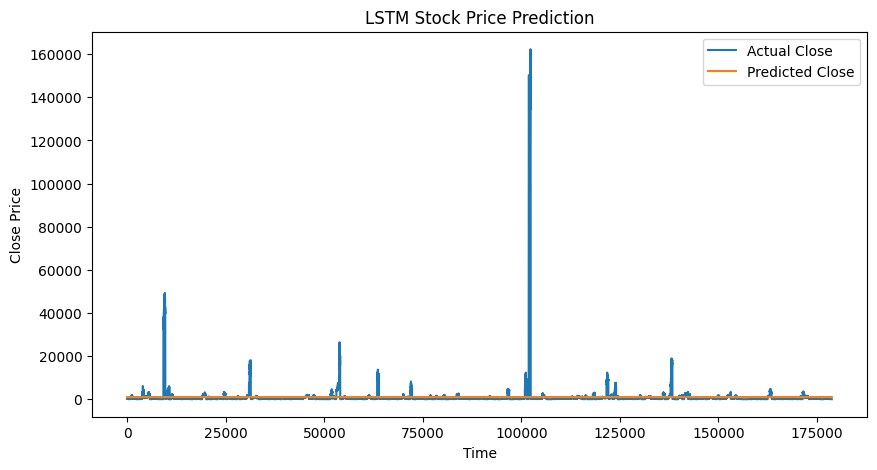

In [22]:
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Inverse scale for interpretability
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[features.index('close')], scaler.scale_[features.index('close')]
y_test_inv = y_test / close_scaler.scale_ - close_scaler.min_ / close_scaler.scale_
y_pred_inv = y_pred / close_scaler.scale_ - close_scaler.min_ / close_scaler.scale_

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual Close')
plt.plot(y_pred_inv, label='Predicted Close')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

MSE : 56110734.4673
RMSE: 7490.7099
MAE : 1432.8156
R²  : -0.0002


# Added Stocks Differently

In [66]:
scaled_df[491:495]

,open,high,low,close,volume,5DMA,ISIN,SectorId
491,0.000182,0.000180,0.000178,0.000177,5.111987e-06,0.006421,0,8.0
492,0.000177,0.000176,0.000176,0.000175,2.211671e-06,0.005959,0,8.0
493,0.000038,0.000038,0.000039,0.000038,0.000000e+00,0.013214,1,3.0
494,0.000036,0.000036,0.000037,0.000036,6.689363e-08,0.025420,1,3.0


In [67]:
lookback = 60
X, y = [], []
for a in range(scaled_df['ISIN'].nunique()):
    print('Stock : ',a+1)
    scaled_df1 = scaled_df[a*493:(a+1)*493]
    scaled_df1.reset_index(inplace=True)
    scaled_df1 = scaled_df1.drop(columns=['index'],axis=1)
    for i in range(lookback, len(scaled_df1)):
        X.append(scaled_df1.iloc[i-lookback:i].values)
        y.append(scaled_df1.iloc[i]['close'])

X, y = np.array(X), np.array(y)

print("X shape:", X.shape)  # (samples, timesteps=60, features)
print("y shape:", y.shape)  # (samples,)

Stock :  1
Stock :  2
Stock :  3
Stock :  4
Stock :  5
Stock :  6
Stock :  7
Stock :  8
Stock :  9
Stock :  10
Stock :  11
Stock :  12
Stock :  13
Stock :  14
Stock :  15
Stock :  16
Stock :  17
Stock :  18
Stock :  19
Stock :  20
Stock :  21
Stock :  22
Stock :  23
Stock :  24
Stock :  25
Stock :  26
Stock :  27
Stock :  28
Stock :  29
Stock :  30
Stock :  31
Stock :  32
Stock :  33
Stock :  34
Stock :  35
Stock :  36
Stock :  37
Stock :  38
Stock :  39
Stock :  40
Stock :  41
Stock :  42
Stock :  43
Stock :  44
Stock :  45
Stock :  46
Stock :  47
Stock :  48
Stock :  49
Stock :  50
Stock :  51
Stock :  52
Stock :  53
Stock :  54
Stock :  55
Stock :  56
Stock :  57
Stock :  58
Stock :  59
Stock :  60
Stock :  61
Stock :  62
Stock :  63
Stock :  64
Stock :  65
Stock :  66
Stock :  67
Stock :  68
Stock :  69
Stock :  70
Stock :  71
Stock :  72
Stock :  73
Stock :  74
Stock :  75
Stock :  76
Stock :  77
Stock :  78
Stock :  79
Stock :  80
Stock :  81
Stock :  82
Stock :  83
Stock :  84
S

In [71]:
df_stocks[df_stocks['volume']==0]['ISIN'].nunique()

1788

In [72]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [73]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output (predicting next-day price)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Projects\Market\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 64)         │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1057s 60ms/step - loss: 2.3264e-04 - val_loss: 5.2617e-04
Epoch 2/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1113s 63ms/step - loss: 2.1026e-04 - val_loss: 5.2650e-04
Epoch 3/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1096s 62ms/step - loss: 2.1015e-04 - val_loss: 5.2629e-04
Epoch 4/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1124s 64ms/step - loss: 2.1013e-04 - val_loss: 5.2762e-04
Epoch 5/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1155s 65ms/step - loss: 2.1015e-04 - val_loss: 5.2881e-04
Epoch 6/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1182s 67ms/step - loss: 2.1011e-04 - val_loss: 5.2623e-04
Epoch 7/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1206s 68ms/step - loss: 2.1019e-04 - val_loss: 5.2621e-04
Epoch 8/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1238s 70ms/step - loss: 2.1018e-04 - val_loss: 5.3015e-04
Epoch 9/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1264s 72ms/step - loss: 2.1017e-04 - val_loss: 5.2766e-04
Epoch 10/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1287s 73ms/step - loss: 2.1

KeyboardInterrupt: 

4907/4907 ━━━━━━━━━━━━━━━━━━━━ 58s 12ms/step


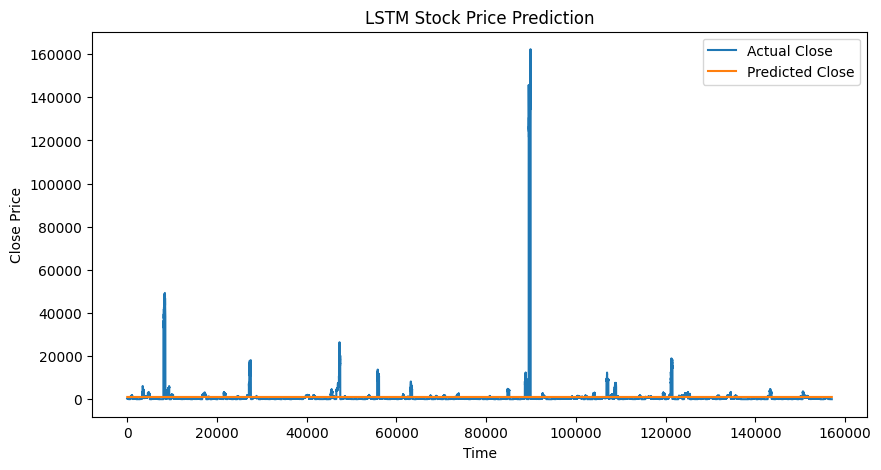

In [59]:
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Inverse scale for interpretability
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[features.index('close')], scaler.scale_[features.index('close')]
y_test_inv = y_test / close_scaler.scale_ - close_scaler.min_ / close_scaler.scale_
y_pred_inv = y_pred / close_scaler.scale_ - close_scaler.min_ / close_scaler.scale_

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual Close')
plt.plot(y_pred_inv, label='Predicted Close')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

MSE : 56544706.4933
RMSE: 7519.6214
MAE : 1472.1807
R²  : -0.0002
